# General config

In [ ]:
roboflow_api_key = "Secret_key" # @param {type:"string"}
url_our = 'https://drive.google.com/file/d/163a9Ee7VObzEfHA3DaLadEnvENROLooF/view?usp=sharing' # @param {type:"string"}

In [ ]:
import os, glob, shutil
import gdown, re
import zipfile

import xml.etree.ElementTree as ET

import random

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle, Polygon

# Data import and preprocessing

## Loading

### Our data

In [ ]:
ignore_classes=['other']

### Provided data

In [ ]:
def download_data_from_gd(url, quiet=False):
  gdown.download_folder(url, quiet=quiet)

In [ ]:
url = 'https://drive.google.com/drive/folders/1hY_tJNh7azAzc6OxyTEAjjz3UxtzhSeO'


working_dir = '/content'
base_data_path = os.path.join(working_dir,'Annotated Images')

our_data_zip = os.path.join(working_dir, 'connected_dataset.zip')

imagenet_dir = os.path.join(base_data_path,'Dataset_ImageNet')
no_label_dir = os.path.join(imagenet_dir,'no_label')

segmentation_dir = os.path.join(base_data_path,'Dataset_SegmentationMask')
classes_txt = os.path.join(segmentation_dir, 'labelmap.txt')
segmentation_list_txt = os.path.join(segmentation_dir, 'ImageSets', 'Segmentation','default.txt')
segmentation_images = os.path.join(segmentation_dir, 'JPEGImages')
segmentation_mask_class = os.path.join(segmentation_dir, 'SegmentationClass')
segmentation_mask_obj = os.path.join(segmentation_dir, 'SegmentationObject')

cvat_dir = os.path.join(base_data_path,'Dataset_CVAT')
cvat_xml = os.path.join(cvat_dir, 'annotations.xml')
cvat_images = os.path.join(cvat_dir, 'images','default')

yolo_dir = os.path.join(base_data_path,'Dataset_YOLO')
yolo_names = os.path.join(yolo_dir, 'obj.names')
yolo_train_data = os.path.join(yolo_dir, 'obj_train_data')
yolo_train_txt = os.path.join(yolo_dir, 'train.txt')

In [ ]:
def convert_drive_link(original_link):
  if "https://drive.google.com/uc?id=" in original_link:
    return original_link
  original_link = original_link.replace('?usp=sharing', '').replace('?usp=drive_link', '')
  pattern = r"https://drive\.google\.com/file/d/([a-zA-Z0-9_-]+)/view"

  matcher = re.match(pattern, original_link)

  if matcher:
    file_id = matcher.group(1)
    converted_link = f"https://drive.google.com/uc?id={file_id}"
    return converted_link
  else:
    raise Exception(f"Not realized Google Drive link format.\nGiven link is {original_link}")
    return None


def install_from_google_drive(link, name, path=None, force_download = False):
  full_path = name
  if path is not None:
    full_path = os.path.join(path, full_path)
  if not force_download:
    if os.path.exists(full_path):
      print('The data already exists')
      return

  print('Start downloading')
  gdown.download(convert_drive_link(link), full_path, quiet=False)
  print('\nDownloading have ended')

In [ ]:
install_from_google_drive(url_our, our_data_zip)

Start downloading


Downloading...
From (original): https://drive.google.com/uc?id=163a9Ee7VObzEfHA3DaLadEnvENROLooF
From (redirected): https://drive.google.com/uc?id=163a9Ee7VObzEfHA3DaLadEnvENROLooF&confirm=t&uuid=4754d2d6-a11b-4d27-9b6e-2e63d7b51fcf
To: /content/connected_dataset.zip
100%|██████████| 114M/114M [00:07<00:00, 15.8MB/s]

In [ ]:
with zipfile.ZipFile(our_data_zip, 'r') as zipp:
  zipp.extractall(path = working_dir)

In [ ]:
if os.path.exists(base_data_path):
  print('data exists')
else:
  download_data_from_gd(url)
  for f in os.listdir(base_data_path):
    if f.endswith('.zip'):
      subdir_path = os.path.join(base_data_path, f[:-4])
      os.mkdir(subdir_path)
      with zipfile.ZipFile(os.path.join(base_data_path, f), 'r') as zipp:
        zipp.extractall(path = subdir_path)
  print('data loaded')

Retrieving folder contents


Processing file 1oEtl3FA7HLnG_JESJ7Bx4mMQYwDgQHnG Dataset_CVAT.zip
Processing file 1QmyWKuCYtuB6l3x4oxjZ7QzEWNirFmO8 Dataset_description.txt
Processing file 1D8dr6eJ8pnj3SAkCWgvUkdVrpEbWVO-n Dataset_ImageNet.zip
Processing file 12pzi5gLAQkts_2ihZ17JKwkDqq-wErAU Dataset_SegmentationMask.zip
Processing file 1HU66YH7iAB-4Kh9j6heglnFdZoX49TOq Dataset_YOLO.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1oEtl3FA7HLnG_JESJ7Bx4mMQYwDgQHnG
From (redirected): https://drive.google.com/uc?id=1oEtl3FA7HLnG_JESJ7Bx4mMQYwDgQHnG&confirm=t&uuid=e1333610-e8bb-48da-8182-5164d6e4f8b3
To: /content/Annotated Images/Dataset_CVAT.zip
100%|██████████| 846M/846M [00:33<00:00, 25.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QmyWKuCYtuB6l3x4oxjZ7QzEWNirFmO8
To: /content/Annotated Images/Dataset_description.txt
100%|██████████| 1.04k/1.04k [00:00<00:00, 2.10MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1D8dr6eJ8pnj3SAkCWgvUkdVrpEbWVO-n
From (redirected): https://drive.google.com/uc?id=1D8dr6eJ8pnj3SAkCWgvUkdVrpEbWVO-n&confirm=t&uuid=fabeffe2-22bd-49ca-b636-51e8cc869bbf
To: /content/Annotated Images/Dataset_ImageNet.zip
100%|██████████| 843M/843M [00:31<00:00, 26.5MB/s]
Downloading...
From (original): http

data loaded


In [ ]:
working_dir = '/content'
img_dir = os.path.join(working_dir, 'image')
annot_xml = os.path.join(working_dir, 'annotations.xml')
# maximus_dir = os.path.join(working_dir, 'Фоточки')
# maximus_img = os.path.join(maximus_dir, 'Максим')
# maximus_annot = os.path.join(maximus_dir, 'annotations.xml')
# ivan_dir = os.path.join(working_dir, 'Ivan_1')
# ivan_img = os.path.join(ivan_dir, 'Ivan_1')
# ivan_annot = os.path.join(ivan_dir, 'annotations.xml')

In [ ]:
tree = ET.parse(annot_xml)
tree_r = tree.getroot()

In [ ]:
tree_2 = ET.parse(cvat_xml)
tree_r_2 = tree_2.getroot()

### Roboflow data

In [ ]:
use_roboflow = len(roboflow_api_key)>0
use_roboflow

True

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install roboflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00


In [ ]:
if use_roboflow:
  from roboflow import Roboflow
  rf = Roboflow(api_key=roboflow_api_key)
  project = rf.workspace("tls-fx17y").project("damaged-building-jytkn")
  for i in range(1,4):
    version = project.version(i)
    dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to damaged-building-1 in yolov8:: 100%|██████████| 1296/1296 [00:00<00:00, 1469.85it/s]


[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to damaged-building-2 in yolov8:: 100%|██████████| 1354/1354 [00:00<00:00, 1682.57it/s]


[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to damaged-building-3 in yolov8:: 100%|██████████| 868/868 [00:00<00:00, 2430.52it/s]


In [ ]:
working_dir = '/content'
damaged_building_1 = os.path.join(working_dir, 'damaged-building-1')
damaged_building_2 = os.path.join(working_dir, 'damaged-building-2')
damaged_building_3 = os.path.join(working_dir, 'damaged-building-3')

## Visualization and dataset forming

In [ ]:
class_cmap={}
roboflow_classes=[]

In [ ]:
for t in [tree_r, tree_r_2]:
  for t2 in t:
    if t2.tag == 'image':
      for t3 in t2:
        if t3.attrib['label'].lower() not in class_cmap and t3.attrib['label'].lower() not in ignore_classes:
          class_cmap[t3.attrib['label'].lower()] = (random.random(), random.random(), random.random())

In [ ]:
if use_roboflow:
  for i in range(1,4):
    base_path = os.path.join(working_dir, 'damaged-building-'+str(i))
    data_yaml = os.path.join(base_path, 'data.yaml')
    with open(data_yaml, 'r') as yaml:
      yaml_content = yaml.read()
    roboflow_class_list = [x[2:] for x in yaml_content.split('\n') if len(x)>0 and x[0]=='-']
    roboflow_classes.append(roboflow_class_list)
    for c in roboflow_class_list:
      c=c.lower()
      if c not in class_cmap and c not in ignore_classes:
        class_cmap[c] = (random.random(), random.random(), random.random())

In [ ]:
def print_class_cmap(class_cmap):
  for k in class_cmap:
    print('\033[38;2;%d;%d;%dm'%class_cmap[k], k)

In [ ]:
def plot_cvat_img(tree_node, img_dir, axis, cut_path=False):
  img_name = tree_node.attrib['name']
  if cut_path:
    img_name = img_name.split('/')[-1]
  axis.imshow(mpimg.imread(os.path.join(img_dir, img_name)))
  label_color_map = class_cmap
  for n in tree_node:
    if n.tag == 'box':
      if n.attrib['label'].lower() in ignore_classes:
        continue
      color = label_color_map[n.attrib['label'].lower()]
      rect = Rectangle((float(n.attrib['xtl']),float(n.attrib['ytl'])),float(n.attrib['xbr'])-float(n.attrib['xtl']),float(n.attrib['ybr'])-float(n.attrib['ytl']), fill=True, alpha=0.5, color=color)
      axis.add_patch(rect)
    elif n.tag == 'polygon':
      if n.attrib['label'].lower() in ignore_classes:
        continue
      color = label_color_map[n.attrib['label'].lower()]
      dotlist = [(s.split(',')[0], s.split(',')[1]) for s in n.attrib['points'].split(';')]
      poly = Polygon(dotlist, fill=True, alpha=0.5, color=color)
      axis.add_patch(poly)

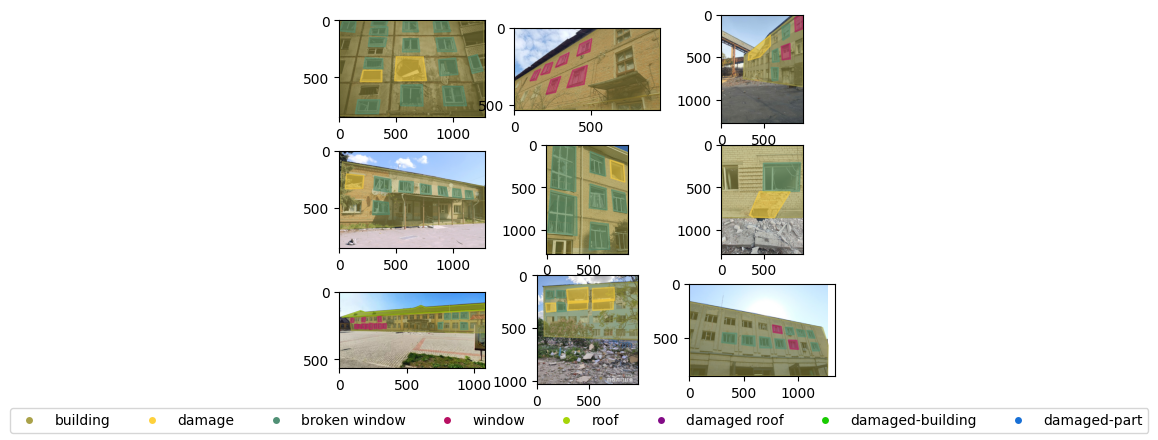

In [ ]:
plot_shape=(3,3)
f, axes = plt.subplots(plot_shape[0], plot_shape[1])
for i in range(plot_shape[0]*plot_shape[1]):
  plot_cvat_img(tree_r[i+2], img_dir, axes[i//plot_shape[1],i%plot_shape[1]], cut_path=True)
lp = lambda i: plt.plot([],color=class_cmap[i], ms=5, mec="none", label=i, ls="", marker="o")[0]
handles = [lp(i) for i in class_cmap]
f.legend(handles=handles, loc='lower center', ncol = len(class_cmap))

In [ ]:
class_cmap_int = {k:tuple(int(x*225)for x in class_cmap[k]) for k in class_cmap}
print_class_cmap(class_cmap_int)

 building
 damage
 broken window
 window
 roof
 damaged roof
 damaged-building
 damaged-part


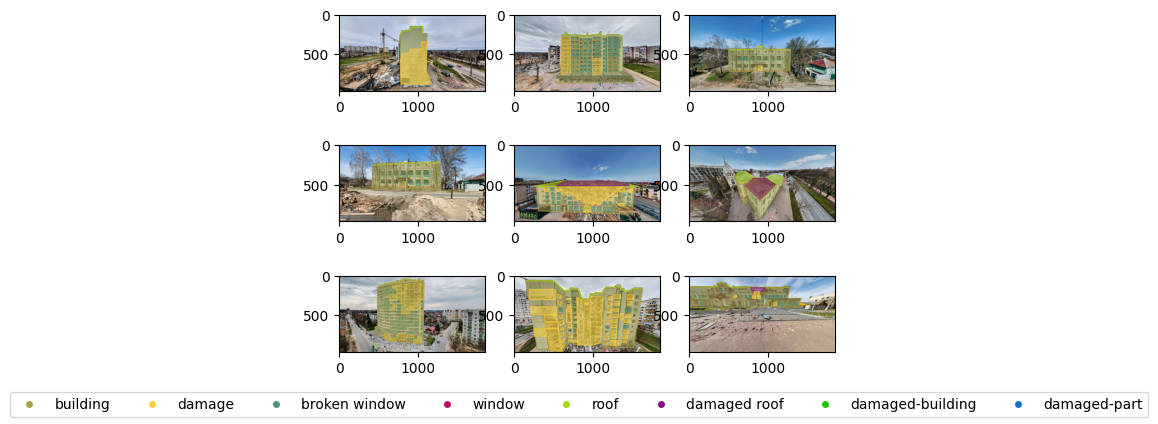

In [ ]:
plot_shape=(3,3)
f, axes = plt.subplots(plot_shape[0], plot_shape[1])
for i in range(plot_shape[0]*plot_shape[1]):
  plot_cvat_img(tree_r_2[i+2], cvat_images, axes[i//plot_shape[1],i%plot_shape[1]], cut_path=True)
lp = lambda i: plt.plot([],color=class_cmap[i], ms=5, mec="none", label=i, ls="", marker="o")[0]
handles = [lp(i) for i in class_cmap]
f.legend(handles=handles, loc='lower center', ncol = len(class_cmap))

In [ ]:
yoloworld_data_base = os.path.join(working_dir, 'yoloworld_data')
yoloworld_dataset = os.path.join(yoloworld_data_base, 'dataset')
yoloworld_train = os.path.join(yoloworld_dataset, 'train')
yoloworld_train_img = os.path.join(yoloworld_train, 'images')
yoloworld_train_labels = os.path.join(yoloworld_train, 'labels')
yoloworld_val = os.path.join(yoloworld_dataset, 'val')
yoloworld_val_img = os.path.join(yoloworld_val, 'images')
yoloworld_val_labels = os.path.join(yoloworld_val, 'labels')

In [ ]:
os.mkdir(yoloworld_data_base)
os.mkdir(yoloworld_dataset)
os.mkdir(yoloworld_train)
os.mkdir(yoloworld_train_img)
os.mkdir(yoloworld_train_labels)
os.mkdir(yoloworld_val)
os.mkdir(yoloworld_val_img)
os.mkdir(yoloworld_val_labels)

In [ ]:
class_list = [k for k in class_cmap]

In [ ]:
train_c, val_c = train_part, val_part = 15,1
triplets=[(img_dir, True, tree_r), (cvat_images, False, tree_r_2)]
for (img_d, cut_p, t_r) in triplets:
  for n in t_r:
    if n.tag == "image":
      boxes = []
      img_name = n.attrib['name']
      if cut_p:
        img_name = img_name.split('/')[-1]
      if not os.path.exists(os.path.join(img_d, img_name)):
        print("! IMAGE "+os.path.join(img_d, img_name)+" NOT FOUND !")
        continue
      img = mpimg.imread(os.path.join(img_d, img_name))
      imshape = img.shape
      for n2 in n:
        if n2.attrib['label'].lower() in ignore_classes:
          continue
        x,y,x2,y2=0,0,0,0
        if n2.tag == 'box':
          x,y,x2,y2 = float(n2.attrib['xtl']),float(n2.attrib['ytl']),float(n2.attrib['xbr']),float(n2.attrib['ybr'])
        elif n2.tag == 'polygon':
          dotlist = [(s.split(',')[0], s.split(',')[1]) for s in n2.attrib['points'].split(';')]
          x_list = [float(d[0]) for d in dotlist]
          y_list = [float(d[1]) for d in dotlist]
          x,y,x2,y2 = min(x_list),min(y_list),max(x_list),max(y_list)
        else:
          continue
        x,y,w,h = (x+x2)/2,(y+y2)/2,x2-x,y2-y
        x/=imshape[1]
        w/=imshape[1]
        y/=imshape[0]
        h/=imshape[0]
        boxes.append([class_list.index(n2.attrib['label'].lower()), x, y, w, h])
      label_text = '\n'.join([' '.join(str(x) for x in b) for b in boxes])
      txt_name = img_name[:-4]+'.txt'
      if train_c>0 or val_c == 0:
        with open(os.path.join(yoloworld_train_labels, txt_name), 'w') as f:
          f.write(label_text)
        shutil.copy(os.path.join(img_d, img_name), yoloworld_train_img)
        train_c -=1
      else:
        with open(os.path.join(yoloworld_val_labels, txt_name), 'w') as f:
          f.write(label_text)
        shutil.copy(os.path.join(img_d, img_name), yoloworld_val_img)
        val_c -=1
        if val_c == 0:
          train_c, val_c = train_part, val_part

! IMAGE /content/image/AUG26 Donetsk region Shelled educational institutions 1.jpg NOT FOUND !


In [ ]:
def plot_yolo_2(img_dir, img_name, boxes, axis):
  im=mpimg.imread(os.path.join(img_dir, img_name))
  axis.imshow(im)
  ims = im.shape
  for b in boxes:
    color = class_cmap[class_list[b[0]]]
    rect = Rectangle(((b[1][0]-b[1][2]/2)*ims[1],(b[1][1]-b[1][3]/2)*ims[0]),b[1][2]*ims[1],b[1][3]*ims[0],color=color,fill=True, alpha=0.5)
    axis.add_patch(rect)

In [ ]:
def plot_damaged_building_dataset(version, subdir):
  base_path = os.path.join(working_dir, 'damaged-building-'+str(version))
  data_yaml = os.path.join(base_path, 'data.yaml')
  img_path  = os.path.join(base_path, subdir, 'images')
  label_path  = os.path.join(base_path, subdir, 'labels')
  with open(data_yaml, 'r') as yaml:
    yaml_content = yaml.read()
  plot_shape=(3,3)
  limit=plot_shape[0]*plot_shape[1]
  fig, axes = plt.subplots(plot_shape[0], plot_shape[1])
  for f in os.listdir(label_path):
    img_name = f[:-4]+'.jpg'
    with open(os.path.join(label_path, f), 'r') as f:
      boxes = [l.split(' ') for l in f]
      boxes = [[class_list.index(roboflow_classes[version-1][int(sp[0])]), [float(sp[i]) for i in range(1,5)]] for sp in boxes]
      limit -= 1
      plot_yolo_2(img_path, img_name, boxes, axes[limit//plot_shape[1], limit%plot_shape[1]])
      if limit==0:
        break
  lp = lambda i: plt.plot([],color=class_cmap[i], ms=5, mec="none", label=i, ls="", marker="o")[0]
  handles = [lp(i) for i in class_list]
  fig.legend(handles=handles, loc='lower center', ncol=len(handles))
  fig.suptitle('version '+str(version))

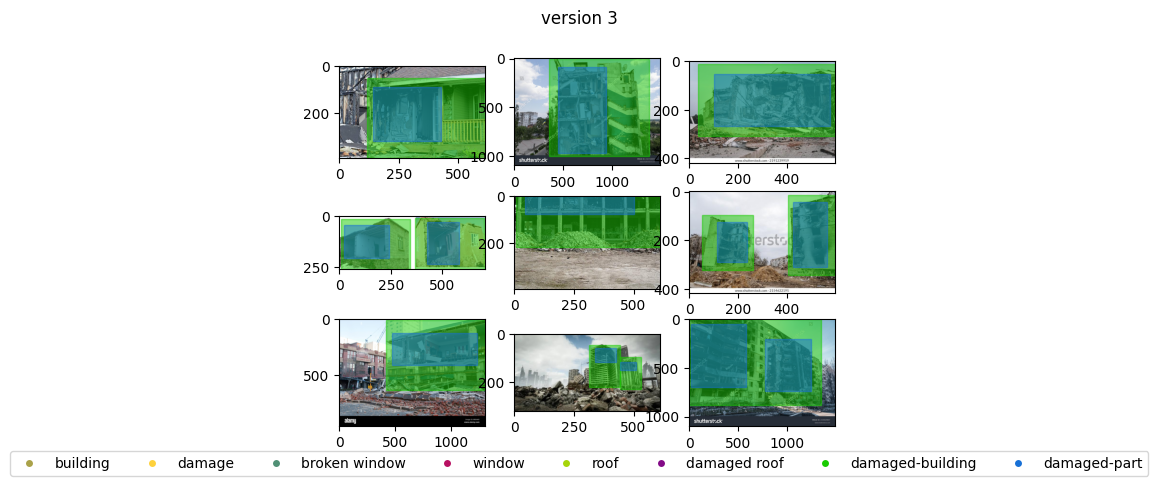

In [ ]:
if use_roboflow:
  plot_damaged_building_dataset(3, 'train')

In [ ]:
if use_roboflow:
  for version in range(1,4):
    yaml_path=os.path.join(working_dir, 'damaged-building-'+str(version), 'data.yaml')
    with open(yaml_path, 'r') as f:
      s = f.read()
    s = '\n'.join(s.split('\n')[:-4])+"\ntest: test\nval: valid\ntrain: train"
    with open(yaml_path, 'w') as f:
      s = f.write(s)

In [ ]:
roboflow_dataset = os.path.join(working_dir, 'roboflow_dataset')
roboflow_yaml = os.path.join(roboflow_dataset, 'data.yaml')

In [ ]:
if use_roboflow:
  os.mkdir(roboflow_dataset)
  for subdir in ['train', 'valid', 'test']:
    current_dir = os.path.join(roboflow_dataset, subdir)
    os.mkdir(current_dir)
    for subdir2 in ['images','labels']:
      os.mkdir(os.path.join(current_dir, subdir2))
  for d in [damaged_building_1, damaged_building_2, damaged_building_3]:
    for subdir in ['train', 'valid', 'test']:
      for subdir2 in ['images','labels']:
        current_dir = os.path.join(d,subdir,subdir2)
        for f in os.listdir(current_dir):
          shutil.copy(os.path.join(current_dir, f), os.path.join(roboflow_dataset, subdir, subdir2))

In [ ]:
if use_roboflow:
  roboflow_all_classes = roboflow_classes[2]
  yaml_content = 'names: '+str(roboflow_all_classes)+'\nnc: '+str(len(roboflow_all_classes))+'\ntest: test\ntrain: train\nval: valid'
  print(yaml_content)
  with open(roboflow_yaml, 'w') as yaml:
    yaml.write(yaml_content)

names: ['damaged-building', 'damaged-part']
nc: 2
test: test
train: train
val: valid


In [ ]:
def plot_yolo(img_dir, img_name, boxes, axis):
  im=mpimg.imread(os.path.join(img_dir, img_name))
  axis.imshow(im)
  ims = im.shape
  for b in boxes:
    color = class_cmap[class_list[b[0]].lower()]
    rect = Rectangle(((b[1][0]-b[1][2]/2)*ims[1],(b[1][1]-b[1][3]/2)*ims[0]),b[1][2]*ims[1],b[1][3]*ims[0],color=color,fill=True, alpha=0.5)
    axis.add_patch(rect)

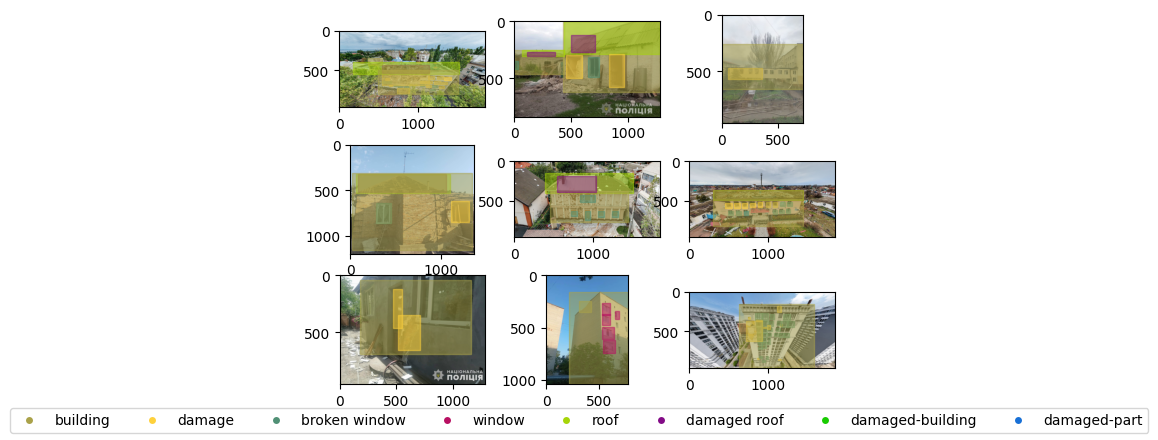

In [ ]:
plot_shape=(3,3)
limit=plot_shape[0]*plot_shape[1]
fig, axes = plt.subplots(plot_shape[0], plot_shape[1])
for f in os.listdir(yoloworld_train_labels):
  img_name = glob.glob(os.path.join(yoloworld_train_img, '.'.join(f.split('.')[:-1]))+'.*')[0].split('/')[-1]
  with open(os.path.join(yoloworld_train_labels, f), 'r') as f:
    boxes = [l.split(' ') for l in f]
    boxes = [[int(sp[0]), [float(sp[i]) for i in range(1,5)]] for sp in boxes]
    limit -= 1
    plot_yolo(yoloworld_train_img, img_name, boxes, axes[limit//plot_shape[1], limit%plot_shape[1]])
    if limit==0:
      break
lp = lambda i: plt.plot([],color=class_cmap[i], ms=5, mec="none", label=i, ls="", marker="o")[0]
handles = [lp(i) for i in class_cmap]
fig.legend(handles=handles, loc='lower center', ncol = len(class_cmap))

In [ ]:
yaml_str = 'train: train\nval: val\nnc: '+str(len(class_list))+'\nnames: '+str(class_list)
print(yaml_str)

train: train
val: val
nc: 8
names: ['building', 'damage', 'broken window', 'window', 'roof', 'damaged roof', 'damaged-building', 'damaged-part']


In [ ]:
with open(os.path.join(yoloworld_dataset, 'dataset.yaml'), 'w') as f:
  f.write(yaml_str)

# Ultralytics

## Model

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 8.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLOWorld

In [ ]:
model = YOLOWorld('yolov8s-world.pt')

100%|██████████| 25.9M/25.9M [00:00<00:00, 242MB/s]


In [ ]:
import gc, torch

gc.collect()
torch.cuda.empty_cache()

## Training (roboflow data)

In [ ]:
gc.collect()
torch.cuda.empty_cache()
if use_roboflow:
  model.train(data=roboflow_yaml, epochs = 5, batch = -1)
  gc.collect()
  torch.cuda.empty_cache()

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s-world.pt, data=/content/roboflow_dataset/data.yaml, epochs=5, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 84.9MB/s]


requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/ultralytics/CLIP.git to /tmp/pip-req-build-5o3p0tkv
  Resolved https://github.com/ultralytics/CLIP.git to commit e17416a36b45d040758327936a1ea150c13fe3d1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.6 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369504 sha256=0aaea4d314e7e219c91f1bb8db44e504f9657a53362bea25ae16404ff0387131
  Stored in directory: /tmp/pip-ephem-wheel-cache-jc90q_ab/wheels/2e/25/92/e26f2a227599930e19a8188891e9600b6dd36721a0f8d6ef40
Successfully built clip

requirements: AutoUpdate success ✅ 10.3s, installed 1 package: ['git+https://github.com/ultralytics/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Overriding model.yaml nc=80

100%|██████████| 6.23M/6.23M [00:00<00:00, 168MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.26G reserved, 0.14G allocated, 14.35G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    13383496        32.8         0.508          35.5         219.3        (1, 3, 640, 640)                    list


adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)


    13383496       65.61         0.835          32.5         70.91        (2, 3, 640, 640)                    list
    13383496       131.2         1.447         37.53         80.35        (4, 3, 640, 640)                    list
    13383496       262.4         2.563         46.22         95.68        (8, 3, 640, 640)                    list
    13383496       524.9         4.891         89.06         167.4       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 28 for CUDA:0 8.77G/14.75G (59%) ✅


train: Scanning /content/roboflow_dataset/train/labels... 1220 images, 10 backgrounds, 0 corrupt: 100%|██████████| 1220/1220 [00:02<00:00, 444.84it/s]


train: New cache created: /content/roboflow_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/roboflow_dataset/valid/labels... 346 images, 4 backgrounds, 0 corrupt: 100%|██████████| 346/346 [00:00<00:00, 393.49it/s]


val: New cache created: /content/roboflow_dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 64 weight(decay=0.0), 82 weight(decay=0.0004375), 88 bias(decay=0.0)


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 86.0MiB/s]


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/44 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        1/5      8.78G      1.273      2.073      1.706         60        640: 100%|██████████| 44/44 [00:44<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]


                   all        346        497      0.326      0.344      0.291      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/44 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        2/5      8.69G      1.205      1.269      1.622         64        640: 100%|██████████| 44/44 [00:41<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        346        497      0.306      0.391      0.347      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/44 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        3/5      8.69G       1.21      1.291      1.625         50        640: 100%|██████████| 44/44 [00:41<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        346        497      0.819      0.311      0.316      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/44 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        4/5      8.69G      1.169      1.206       1.59         55        640: 100%|██████████| 44/44 [00:40<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]

                   all        346        497      0.879      0.355      0.382      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/44 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        5/5      8.69G      1.127      1.087      1.553         58        640: 100%|██████████| 44/44 [00:41<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        346        497      0.608      0.409      0.489        0.3



5 epochs completed in 0.074 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 27.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 27.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-world summary (fused): 211 layers, 13372904 parameters, 0 gradients, 36.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.55s/it]


                   all        346        497      0.607      0.409      0.489        0.3
      damaged-building        346        386      0.791      0.765      0.855      0.548
          damaged-part        346        111      0.424     0.0541      0.123     0.0514
Speed: 0.3ms preprocess, 6.2ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train


## Training (our data + provided data)

In [ ]:
model.train(data=os.path.join(yoloworld_dataset, 'dataset.yaml'), epochs = 5, batch = -1)

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s-world.pt, data=/content/yoloworld_data/dataset/dataset.yaml, epochs=5, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)


    13383496       65.62         0.845         50.15         47.35        (2, 3, 640, 640)                    list
    13383496       131.2         1.504          66.4         69.95        (4, 3, 640, 640)                    list
    13383496       262.5         2.634         109.4         99.37        (8, 3, 640, 640)                    list
    13383496         525         4.962         92.74         137.5       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 26 for CUDA:0 9.22G/14.75G (63%) ✅


train: Scanning /content/yoloworld_data/dataset/train/labels... 570 images, 2 backgrounds, 0 corrupt: 100%|██████████| 572/572 [00:07<00:00, 74.24it/s]

train: WARNING ⚠️ /content/yoloworld_data/dataset/train/images/download3_1.png: 1 duplicate labels removed
train: New cache created: /content/yoloworld_data/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/yoloworld_data/dataset/val/labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:01<00:00, 32.24it/s]

val: New cache created: /content/yoloworld_data/dataset/val/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 64 weight(decay=0.0), 82 weight(decay=0.00040625000000000004), 88 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/22 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        1/5      9.71G      2.314      3.314      1.961        794        640: 100%|██████████| 22/22 [00:49<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all         38       1036      0.322      0.263      0.196      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/22 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        2/5      11.6G      1.814      1.959      1.459        866        640: 100%|██████████| 22/22 [00:38<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         38       1036      0.391      0.294      0.272      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/22 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        3/5      10.4G       1.72      1.822      1.386       1087        640: 100%|██████████| 22/22 [00:34<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         38       1036      0.281      0.325      0.321      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/22 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        4/5      12.4G      1.662       1.71      1.318       1022        640: 100%|██████████| 22/22 [00:33<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         38       1036      0.349      0.378       0.37      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/22 [00:00<?, ?it/s]adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:79.)
        5/5      11.9G      1.607      1.652      1.293       1007        640: 100%|██████████| 22/22 [00:35<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         38       1036      0.421      0.427      0.389      0.236



5 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 27.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 27.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-world summary (fused): 211 layers, 13372904 parameters, 0 gradients, 39.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


                   all         38       1036      0.422      0.419      0.389      0.237
              building         38         43      0.633      0.884       0.88      0.687
                damage         38        171      0.237      0.189      0.166     0.0702
         broken window         38        756      0.494      0.587      0.475      0.264
                window         38         35      0.185      0.182      0.229     0.0982
                  roof         38         18      0.331      0.444      0.356      0.172
          damaged roof         38         13      0.653      0.231      0.226      0.128
Speed: 0.2ms preprocess, 6.4ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aaa4d3da560>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

## Predicting

In [ ]:
import cv2
import numpy as np

In [ ]:
img_to_predict = '/content/yoloworld_data/dataset/val/images/MAY31 Mezhyrich community Dnipropetrovsk region Transport company damaged by shelling, 8-year-old boy lightly wounded 2.jpg' #@param {type:"string"}


image 1/1 /content/yoloworld_data/dataset/val/images/MAY31 Mezhyrich community Dnipropetrovsk region Transport company damaged by shelling, 8-year-old boy lightly wounded 2.jpg: 480x640 1 building, 8 damages, 1 broken window, 35.2ms
Speed: 3.1ms preprocess, 35.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


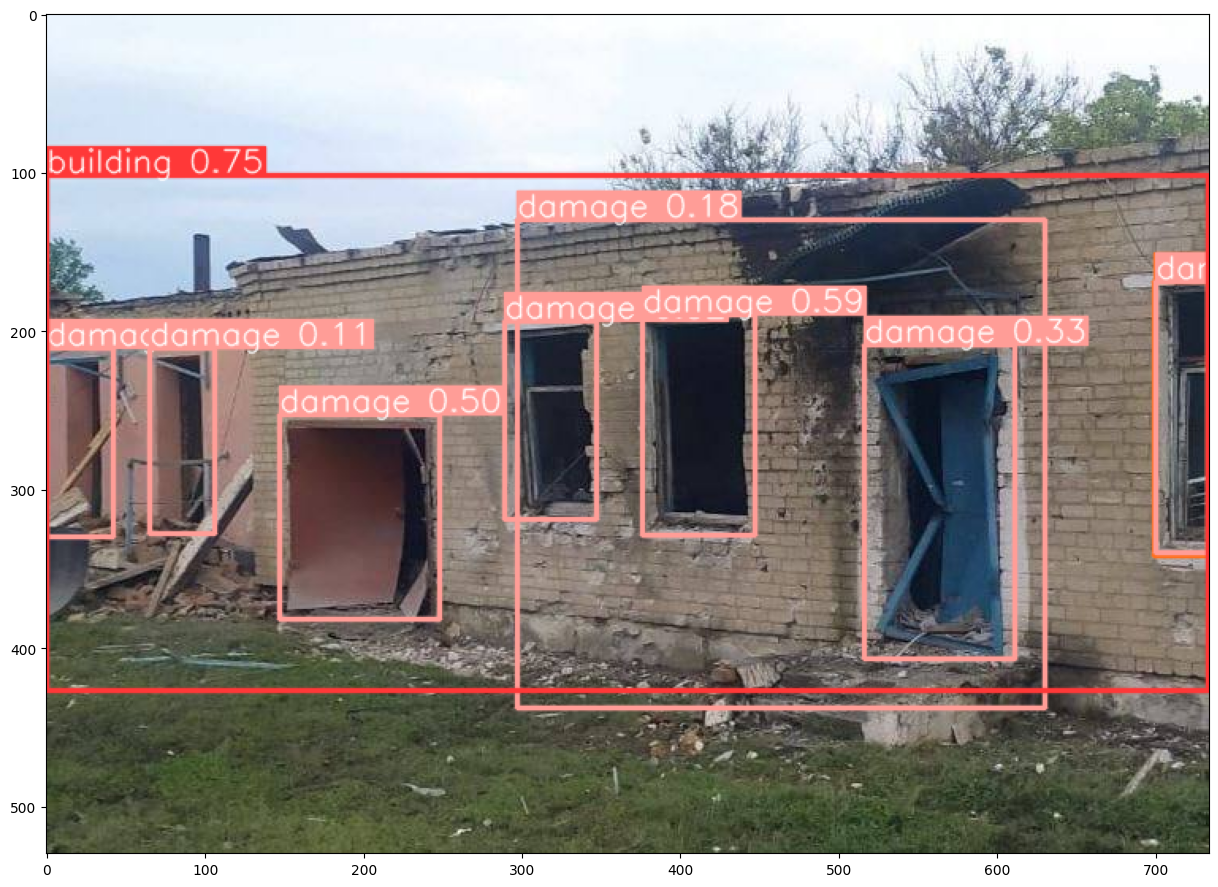

In [ ]:
if len(img_to_predict)>0:
  plt.figure(figsize=(15,15))
  model.set_classes(class_list)
  result = model.predict(img_to_predict, conf = 0.1, iou = 0.2)
  image = cv2.cvtColor(result[0].plot(), cv2.COLOR_BGR2RGB)
  pixels = np.array(image)
  plt.imshow(pixels);
else: print('Provide path')

In [ ]:
result[0].boxes.conf

tensor([0.7494, 0.5933, 0.5233, 0.5027, 0.3307, 0.2489, 0.2301, 0.1832, 0.1127, 0.1078], device='cuda:0')

In [ ]:
result_boxes = [(class_list[int(b.cls)], b.xyxy[0].tolist(), b.conf.tolist()[0]) for b in result[0].boxes]

In [ ]:
from itertools import combinations

def calculate_area(bbox):
    x_min, y_min, x_max, y_max = bbox
    return (x_max - x_min) * (y_max - y_min)

def is_center_inside(inner_bbox, outer_bbox):
    x_min_inner, y_min_inner, x_max_inner, y_max_inner = inner_bbox
    center_x_inner = (x_min_inner + x_max_inner) / 2
    center_y_inner = (y_min_inner + y_max_inner) / 2
    x_min_outer, y_min_outer, x_max_outer, y_max_outer = outer_bbox
    return (x_min_outer <= center_x_inner <= x_max_outer) and (y_min_outer <= center_y_inner <= y_max_outer)

def calculate_overlap_area(bbox1, bbox2):
    x_min1, y_min1, x_max1, y_max1 = bbox1
    x_min2, y_min2, x_max2, y_max2 = bbox2
    overlap_x_min = max(x_min1, x_min2)
    overlap_y_min = max(y_min1, y_min2)
    overlap_x_max = min(x_max1, x_max2)
    overlap_y_max = min(y_max1, y_max2)
    if overlap_x_min < overlap_x_max and overlap_y_min < overlap_y_max:
        return (overlap_x_max - overlap_x_min) * (overlap_y_max - overlap_y_min)
    return 0

def calculate_non_overlapping_area(labels):
    if not labels:
        return 0
    total_area = sum(calculate_area(label) for label in labels)

    for label1, label2 in combinations(labels, 2):
        total_area -= calculate_overlap_area(label1, label2)
    return total_area

highest_conf_building = max((item for item in result_boxes if item[0] == 'building'), key=lambda x: x[2])
building_bbox = highest_conf_building[1]
building_area = calculate_area(building_bbox)

label_groups = {}
for label in result_boxes:
    if label[0] != 'building' and is_center_inside(label[1], building_bbox):
        label_type = label[0]
        if label_type not in label_groups:
            label_groups[label_type] = []
        label_groups[label_type].append(label[1])

labels_details = []
for label_type, bboxes in label_groups.items():
    total_label_area = calculate_non_overlapping_area(bboxes)
    label_ratio = total_label_area / building_area if building_area > 0 else 0
    label_ratio = max(0, min(label_ratio, 1))
    labels_details.append({
        'label_type': label_type,
        'combined_area': total_label_area,
        'combined_ratio': label_ratio
    })

result = {
    'highest_conf_building_area': building_area,
    'labels_inside': labels_details
}

print(result)

{'highest_conf_building_area': 238559.29598643593, 'labels_inside': [{'label_type': 'damage', 'combined_area': 132302.9599185701, 'combined_ratio': 0.5545915088804279}, {'label_type': 'broken window', 'combined_area': 5945.396992821246, 'combined_ratio': 0.024922093135114263}]}


In [ ]:

for detail in labels_details:
    percentage = detail['combined_ratio'] * 100
    print(f"{detail['label_type'].capitalize()} займає {percentage:.2f}% будівлі.")

Damage займає 55.46% будівлі.
Broken window займає 2.49% будівлі.


# Saving

In [ ]:
model.save("custom_yolov8s.pt")

# Using

In [ ]:
def process_image(img):
    img_to_predict = [img]  # Assume model expects a list of images
    if len(img_to_predict) > 0:
        plt.figure(figsize=(15, 15))
        model.set_classes(class_list)  # Assuming class_list is predefined
        result = model.predict(img_to_predict, conf=0.1, iou=0.2)
        image = cv2.cvtColor(result[0].plot(), cv2.COLOR_BGR2RGB)
        pixels = np.array(image)
        plt.imshow(pixels)
        plt.axis('off')
        plt.show()

        print('Details:')
        result_boxes = [(class_list[int(b.cls)], b.xyxy[0].tolist(), b.conf.tolist()[0]) for b in result[0].boxes]

        highest_conf_building = max((item for item in result_boxes if item[0] == 'building'), key=lambda x: x[2])
        building_bbox = highest_conf_building[1]
        building_area = calculate_area(building_bbox)

        label_groups = {}
        for label in result_boxes:
            if label[0] != 'building' and is_center_inside(label[1], building_bbox):
                label_type = label[0]
                if label_type not in label_groups:
                    label_groups[label_type] = {'bboxes': [], 'count': 0}
                label_groups[label_type]['bboxes'].append(label[1])
                label_groups[label_type]['count'] += 1

        labels_details = []
        for label_type, info in label_groups.items():
            total_label_area = calculate_non_overlapping_area(info['bboxes'])
            label_ratio = total_label_area / building_area if building_area > 0 else 0
            label_ratio = max(0, min(label_ratio, 1))
            labels_details.append({
                'label_type': label_type,
                'combined_area': total_label_area,
                'combined_ratio': label_ratio,
                'count': info['count']
            })

        result = {
            'highest_conf_building_area': building_area,
            'labels_inside': labels_details
        }

        print(result)

        for detail in labels_details:
            percentage = detail['combined_ratio'] * 100
            print(f"{detail['label_type'].capitalize()} займає {percentage:.2f}% будівлі.")

    else:
        print('Provide an image')


0: 448x640 1 building, 2 damages, 44 broken windows, 1 window, 34.9ms
Speed: 4.4ms preprocess, 34.9ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


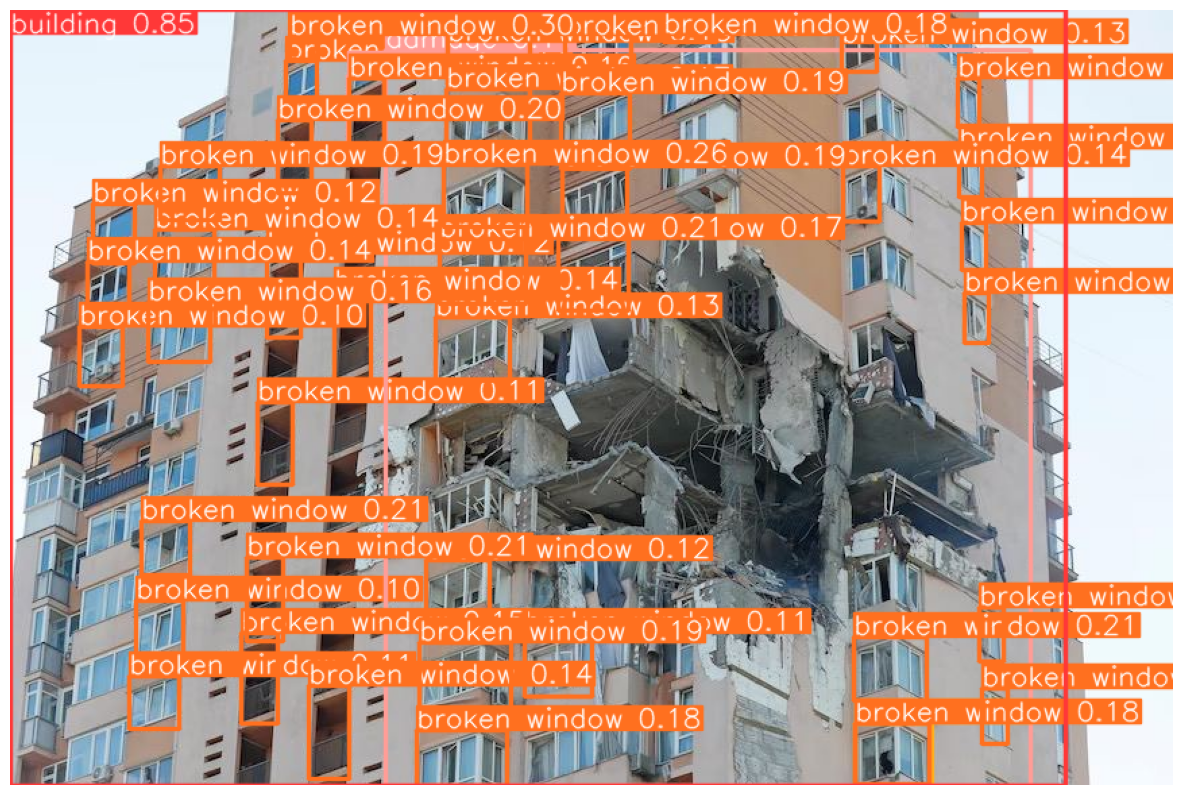

Details:
{'highest_conf_building_area': 449693.48346782406, 'labels_inside': [{'label_type': 'broken window', 'combined_area': 76602.16530343016, 'combined_ratio': 0.17034306281850115, 'count': 44}, {'label_type': 'window', 'combined_area': 2572.189787104726, 'combined_ratio': 0.005719873384130923, 'count': 1}, {'label_type': 'damage', 'combined_area': 262576.8815185226, 'combined_ratio': 0.583901904678835, 'count': 2}]}
Broken window займає 17.03% будівлі.
Window займає 0.57% будівлі.
Damage займає 58.39% будівлі.


In [ ]:
from IPython.display import HTML, display
from google.colab import output
from base64 import b64decode
import cv2
import numpy as np
import matplotlib.pyplot as plt

html_code = """
<style>
.drop-area {
  border: 2px dashed #ccc;
  border-radius: 5px;
  width: 300px;
  height: 100px;
  padding: 8px;
  text-align: center;
  font-size: 16px;
  line-height: 100px;
}
</style>
<div class="drop-area" id="drop-area">
  Drag and drop an image here
</div>
<script>
var dropArea = document.getElementById('drop-area');
dropArea.addEventListener('dragover', (event) => {
  event.stopPropagation();
  event.preventDefault();
  event.dataTransfer.dropEffect = 'copy';
});
dropArea.addEventListener('drop', (event) => {
  event.stopPropagation();
  event.preventDefault();
  const fileList = event.dataTransfer.files;
  const reader = new FileReader();
  reader.onload = function(event) {
    google.colab.kernel.invokeFunction('notebook.upload_file', [event.target.result], {});
  };
  reader.readAsDataURL(fileList[0]);
});
</script>
"""

display(HTML(html_code))

# Python function to handle file upload
def upload_file(b64_string):
    img_data = b64decode(b64_string.split(',')[1])
    img_array = np.frombuffer(img_data, dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    process_image(img)

output.register_callback('notebook.upload_file', upload_file)